# Day 3: Functions in the Euler Method and `solve_ivp`

#### &#9989; **Write your name here**

To begin, work on finishing your code from Day 2. You can continue your work below, or work directly in your Day 2 notebook (and then skip to Part 2).

---
## Part 1: Finishing Day 2 (Parts 3 and 4 copied here)

&#9989; **(Day 2) Task 3.1:** Copy your documentation for your function from Task 2.2 below, and write a couple lines of code below it: the function definition, and the return/output line. Leave the implementation empty for now. It should be structured something like this:

```
# your
# function
# documentation

def Euler(arg1, arg2, arg3):
    # implementation
    # empty
    # for now
    return output
```

In [1]:
# your answer here

&#9989; **(Day 2) Task 3.2:** It's time to plan your implementation. Consult the resources you have: your plans from Part 2, your coded Euler method from Day 1, and/or your instructors. Write your plan for converting arguments into output in code, on your whiteboard and/or in psuedocode below.

**your plan here, and/or on your whiteboard at your table**

```
feel free
to write
psuedocode
```

&#9989; **(Day 2) Task 3.3:** Copy and paste your starting point from Task 3.1, and write your implementation into your function!

In [2]:
# your answer here

#### &#128721; **Stop here and check in with an instructor.**

&#9989; **(Day 2) Task 4.1:** Try out your function, using `dTdt` as your derivative, and the provided inputs. Feel free to alter the provided values to match your planned arguments.

In [4]:
# provided argument values
# probably more values than you need for your function

import numpy as np

# known derivative
# T: temperature
# tau and Tenv are constants, defaulting to 500 1/s and 20 degrees C
# output: dT/dt
def dTdt(T, tau=500, Tenv=20):
    return -1 / tau * (T - Tenv)

# initial temp
T0 = 100

# time values
t0 = 0
tf = 3600
dt = 1
t_vals = np.arange(t0, tf, dt)

In [5]:
# your answer here
# call your Euler function here

&#9989; **(Day 2) Task 4.2:** Using your output, create a visualization of temperature vs. time (i.e., temperature on the y-axis, time on the x-axis). Label your plot clearly.

In [7]:
# your answer here

&#9989; **(Day 2) Task 4.3:** Try out your function, using `dIdt` as your derivative, which represents the current in an RC circuit as a capacitor charges. Feel free to alter the provided values to match your planned arguments. Using your output, create a visualization of current vs. time. Label your plot clearly.

In [9]:
# provided argument values
# probably more values than you need for your function

# known derivative
# I: current
# R and C are constants, defaulting to 100 ohms and 6 mF
# output: dI/dt
def dIdt(I, R=100, C=0.006):
    return -I / (R * C)

# initial current value
I0 = 0.05

# time values
t0 = 0
tf = 2
dt = 0.01
t_vals = np.arange(t0, tf, dt)

In [10]:
# your answer here
# call your Euler function here

---
## Part 2: Using `solve_ivp`

Next, we will use a function called `solve_ivp`, which stands for "solve an initial value problem." This function comes from the SciPy library, and requires a specific set of inputs when called. It can be used to solve problems similar to your Euler method function, but with more precision.

Follow the steps below to learn how to use it.

#### **Step 1: Importing**

Use this code chunk to gain access to `solve_ivp` and other relevant tools.

In [12]:
from scipy.integrate import solve_ivp
import numpy as np
import matplotlib.pyplot as plt

#### **Step 2: Define a function to capture your ODE**

The first input to `solve_ivp` is a function. Go back and read that sentence again. The first input to `solve_ivp` is *itself* a function that computes a derivative.

Let's go through this example, using the ODE for the current in an RC-circuit right when it gets turned on.

$$\frac{dI}{dt} = -\frac{I}{RC}$$

**&#9989; Task 2.1:** Complete the function below. Read the comments carefully to learn how a differential function must be defined when you use it for `solve_ivp`. The structure of this function is required to fit a specific format in order for `solve_ivp` to work properly.

In [13]:
# Function to compute an ODE (or multiple ODEs)

# inputs: t, curr_vals, other parameters
# t: required to be first input, not needed in the function itself
# curr_vals: a single input formatted as a list of values
#    for which ODEs are being computed
# more parameters: other constants to be used in the ODE(s)
# output: derivatives of each variable in curr_vals,
#    separated by commas if there are multiple

def diff_I(t, curr_vals, R, C):
    # extract I from curr_vals
    I = curr_vals[0]
    
    # compute derivatives of all variables
    # ADD CODE HERE TO MAKE THIS FUNCTION WORK
    
    # output all derivatives
    return dIdt

#### **Step 3: Set initial conditions, times, and other parameter values**

The second input to `solve_ivp` is a **tuple** (like a list, but with parentheses instead of square brackets) of the beginning time value and the ending time value. We will start at 0 seconds, and end at 2 seconds.

The third input to `solve_ivp` is a **list** of initial conditions. We will start with a current of 50 mA.

The fourth input to `solve_ivp` is a **NumPy array** of times. Again, we will go from 0 to 2 seconds, with a small increment. Smaller increments mean more precise results and smoother visualizations.

The final input to `solve_ivp` is a **tuple** of the other constant parameter values. In our example, we will use a resistor of 100 $\Omega$ and a capacitor of 6 mF.

In [15]:
# start time and end time, as a tuple
t_start = 0
t_end = 2
t_tuple = (t_start, t_end)

# initial conditions, as a list
I0 = 0.05
init = [I0]

# time array, as a numpy array with small increment
dt = 0.01
t_array = np.arange(t_start, t_end, dt)

# constant parameters, as a tuple
R = 100
C = 0.006
params = (R, C)

#### **Step 4: Call `solve_ivp`**

At this point, we have everything we need to call `solve_ivp`. We can do this using the following format:

```
sol = solve_ivp(ODE_func, time_tuple, initial_values, t_eval=times, args=parameters)
```

Notice:
- We need to assign the output of `solve_ivp` to a new variable (we're calling it `sol` in this example).
- The default variables have specific names: `t_eval` and `args`. These names must be included when calling `solve_ivp`.

**&#9989; Task 2.2:** Call `solve_ivp`, using the corresponding inputs designed in the previous couple steps.

In [16]:
# add code here
sol = 

SyntaxError: invalid syntax (3097861144.py, line 2)

#### **Step 5: Plot the results**

We are ready to extract the results from `solve_ivp` and plot them. To do so, let's first take a look at what `sol`, the output of `solve_ivp`, looks like.

In [23]:
# run this code
sol

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  1.000e-02 ...  1.980e+00  1.990e+00]
        y: [[ 5.000e-02  4.917e-02 ...  1.847e-03  1.817e-03]]
      sol: None
 t_events: None
 y_events: None
     nfev: 32
     njev: 0
      nlu: 0

Notice how we have numerical values stored in arrays at `t` and `y`. These are the time values (`t`) that `solve_ivp` used to solve our initial value problem, and the solution (`y`). We can access these using `sol.t` and `sol.y[0]`. We use a 0-index to access the solution for the current in the circuit, because `I` is the first (and only) variable we solved for. If we had multiple ODEs, or multiple variables to solve for in our initial value problem, those solutions would be stored in `sol.y[0]`, `sol.y[1]`, `sol.y[2]`, and so on.

In [24]:
t = sol.t
I = sol.y[0]

**&#9989; Task 2.3:** Arrays of $t$ values and $I$ values have been extracted from `sol`. Plot time on the x-axis, and current on the y-axis. Make sure your visualization is labeled clearly.

In [25]:
# your answer here

#### &#128721; **Stop here and check in with an instructor.**

---

## Part 3: Solve an initial value problem from scratch

Team up with a small group of peers and work together to solve the problem below. Your job is to: 
- create the ODE function and other necessary inputs for `solve_ivp`
- use `solve_ivp` to approximate a solution
- use your Euler method function from Day 2 to approximate a solution
- visualize the comparison between the two approximation and the exact solution (this will be given)

&#9989; **Task 3.1: Cooling cheese in the fridge**

Complete the above objectives for the temperature of a block of room temperature cheese that has been put in the fridge to cool. Here is some relevant info.

- The ODE is:

$$\frac{dT}{dt} = -\frac{1}{\tau} (T - T_{\text{env}})$$

- $\tau$ is a time constant of heat transfer, and it equals 5,000 s
- $T_\text{env}$ is the surrounding temperature, which is the fridge, set to 2 °C
- Initial temperature of the cheese is 20 °C
- Model the cheese for at least 4 hours in the fridge (14,400 seconds)

<img src="https://www.tastingtable.com/img/gallery/the-reason-you-shouldnt-store-cheese-in-the-refrigerator-door/l-intro-1650486884.jpg"
     alt="Cheese in the fridge"
     width="400"
/>

In [27]:
# your answer here

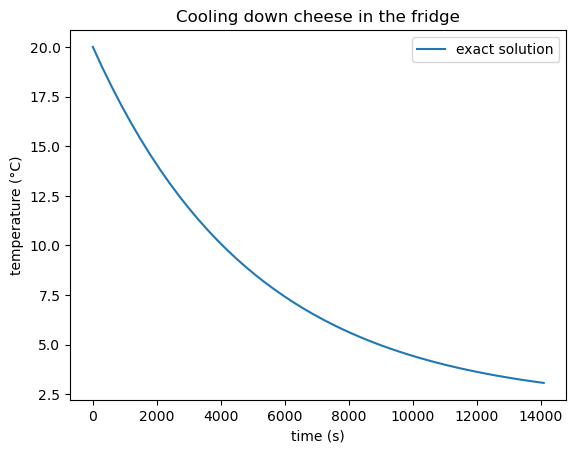

In [39]:
# exact solution is given here for comparison
# feel free to add to this code chunk

t_exact = np.arange(0, 14400, 300)
plt.plot(t_exact, 2 + 18 * np.exp(-0.0002 * t_exact), label="exact solution")

plt.xlabel("time (s)")
plt.ylabel("temperature (°C)")
plt.title("Cooling down cheese in the fridge")
plt.legend()
plt.show()

&#9989; **Task 3.2:** Compare your two approximations to the exact solution. Provide a visualization to demonstrate this comparison. If there seems to be too much overlap to see a difference, try this:
- Increase your time-step to at least 5 minutes (300 seconds).
- Zoom in on the plotted curves using the `xlim` and the `ylim` functions.

#### &#128721; **Stop here and check in with an instructor.**

&#9989; **Task 3.3:** Discuss these questions with peers, and write your notes in the space below.

- By default, `solve_ivp` uses a 4th-order Runge-Kutta method to solve the ODE, compared to the Euler method, which is a 1st-order Runge-Kutta method. What does **order** mean here, and why does it matter?
- How confident are you that `solve_ivp` would give you an accurate approximation, if you didn't have any exact solution to compare it to?
- What can you change in the `solve_ivp` inputs to give you a more precise approximation?
- What if you had **multiple ODEs** that you needed to solve for different unknown variables (for example, position and velocity in projectile motion)? Do you feel confident adjusting your usage of `solve_ivp` to account for this? What questions or challenges would you anticipate having?

**/your discussion notes here/**